# Sistema de agrupación de casas

In [3]:
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
df.shape

(20640, 9)

In [15]:
#ELiminamos las columnas poco relevantes para el estudio del caso

data_house=df.drop(columns=["HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "MedHouseVal"])
data_house.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [16]:
valores_nulos=data_house.isnull().sum()
print(valores_nulos)

MedInc       0
Latitude     0
Longitude    0
dtype: int64


In [17]:
#Gruardamos el conjunto de datos limpio
import os

# Definir la ruta de la carpeta y el archivo
archivo_csv = os.path.join("/workspaces/K-Medias/data", "data_house_limpio.csv")

# Guardar el DataFrame en la carpeta "data"
data_house.to_csv(archivo_csv, index=False)

print(f"Archivo guardado exitosamente: {archivo_csv}")

Archivo guardado exitosamente: /workspaces/K-Medias/data/data_house_limpio.csv


In [4]:
data=pd.read_csv("/workspaces/K-Medias/data/data_house_limpio.csv")
print(data)

       MedInc  Latitude  Longitude
0      8.3252     37.88    -122.23
1      8.3014     37.86    -122.22
2      7.2574     37.85    -122.24
3      5.6431     37.85    -122.25
4      3.8462     37.85    -122.25
...       ...       ...        ...
20635  1.5603     39.48    -121.09
20636  2.5568     39.49    -121.21
20637  1.7000     39.43    -121.22
20638  1.8672     39.43    -121.32
20639  2.3886     39.37    -121.24

[20640 rows x 3 columns]


Clasifica los datos en 6 clusters utilizando, para ello, el modelo K-Means. A continuación, almacena el cluster al que pertenece cada casa como una columna nueva del dataset. Podrías llamarla cluster. Para introducirla a tu conjunto de datos quizá tengas que categorizarla. Observa qué formato y valores tiene y actúa en consecuencia. Grafícala en un diagrama de puntos y describe lo que ves.

In [21]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# Entrenar el modelo
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)



KMeans(n_clusters=6, random_state=42)

In [22]:
y_train = list(model.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


In [19]:
y_pred = model.predict(X_test)
print(y_pred)

[3 3 5 ... 2 5 3]


In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

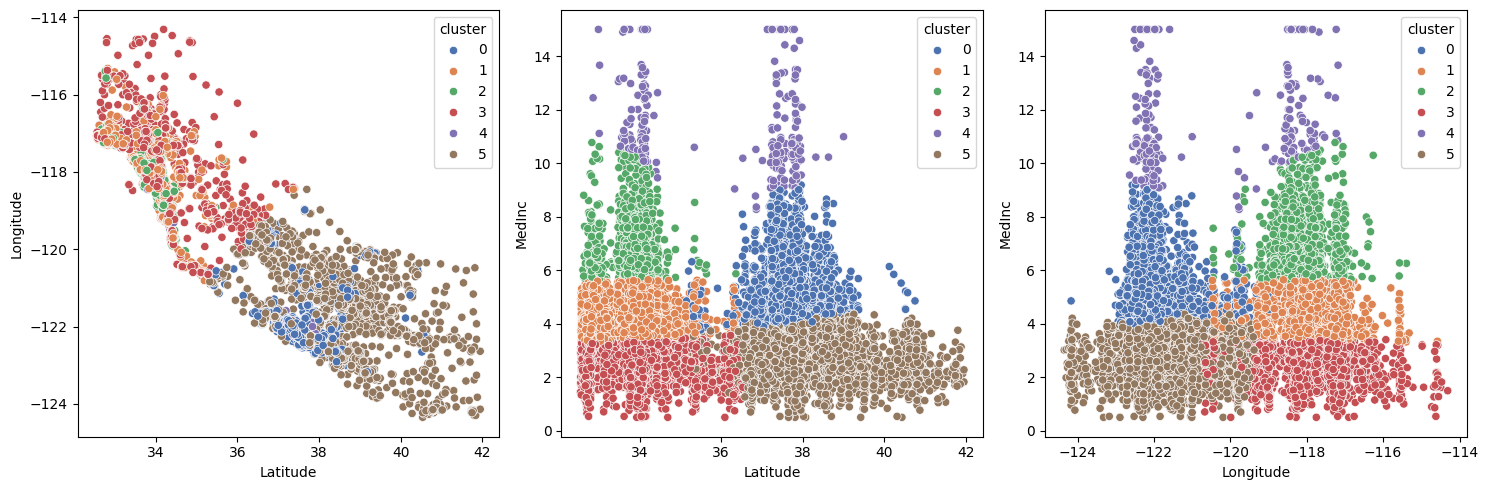

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()

En estos graficos podemos observar como se distribuyen os 6 clústeres geográficamente y en nivel socioeconómico.

Los grupos de clústeres estan separados de una manera muy marcada lo cual quiere decir que tiene mucha relacion la ubicacion con los ingresos medios.

en algunos lugares los valores medios de ingresos se entrelazan como en las zonas intermedias, pero generalmente los patrones son claros.

In [24]:
y_test = list(model.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


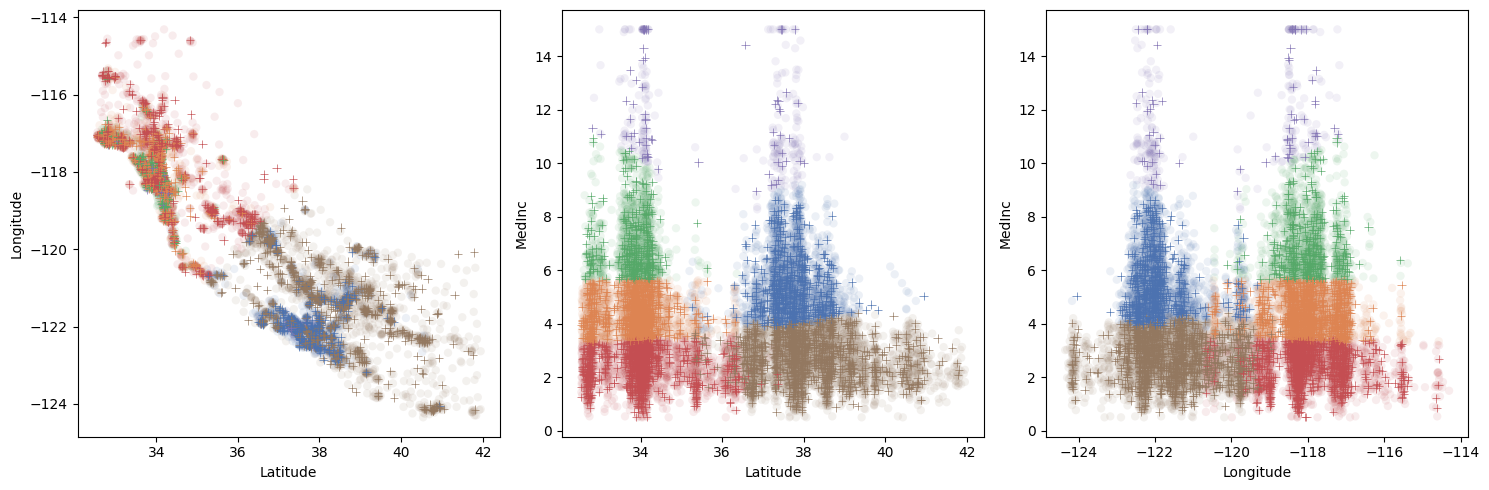

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
plt.tight_layout()


sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

In [27]:
from sklearn.tree import DecisionTreeClassifier

model_Decision_tree = DecisionTreeClassifier(random_state = 42)
model_Decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

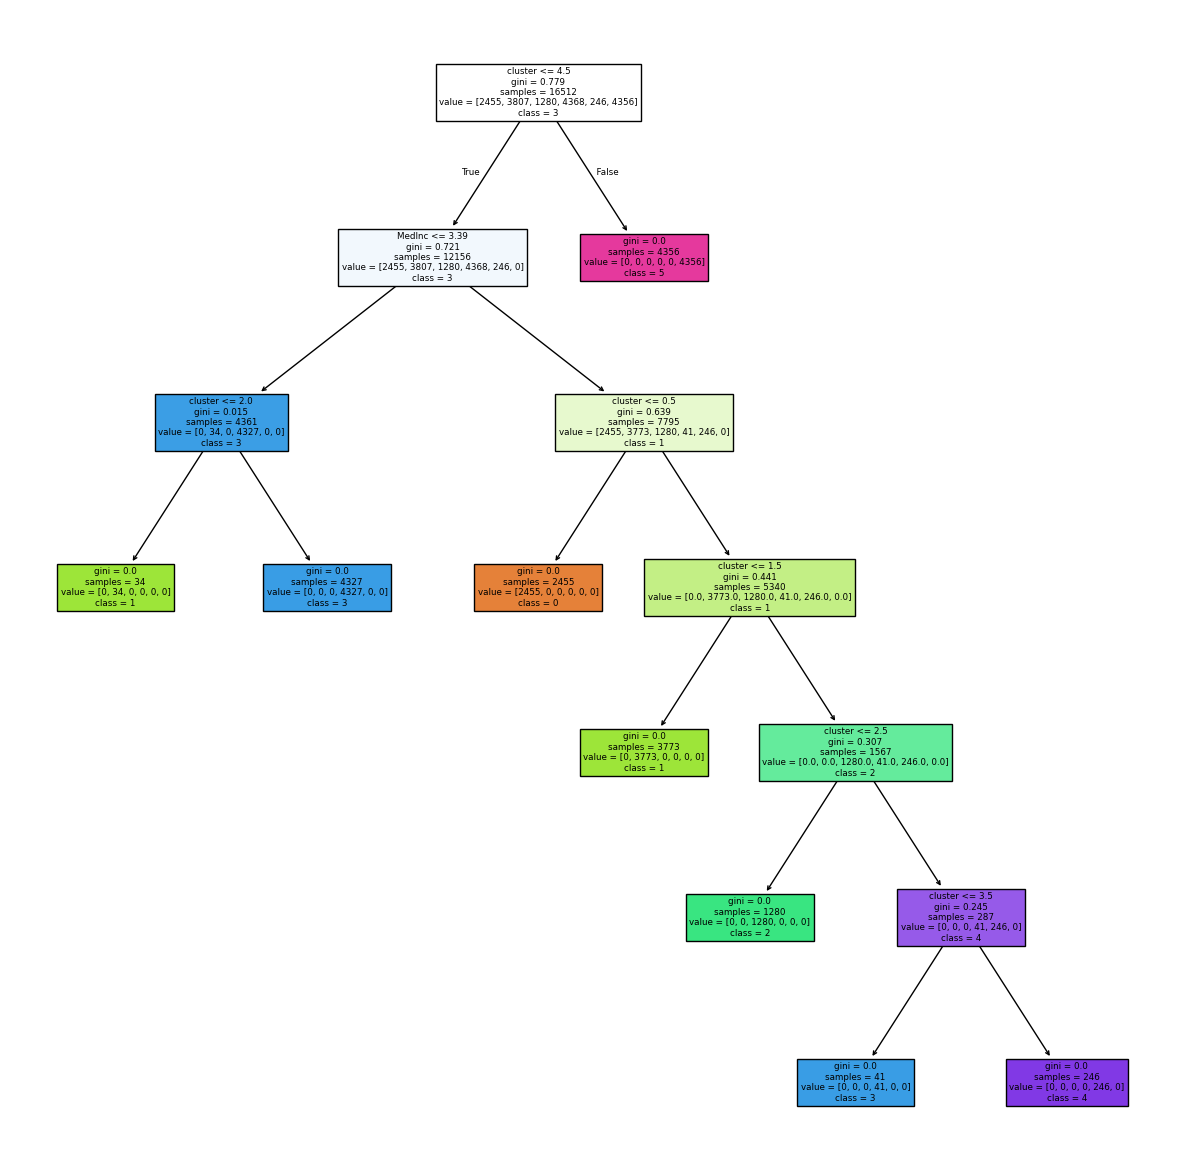

In [28]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_Decision_tree, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [30]:
y_pred_Decision_tree = model_Decision_tree.predict(X_test)
y_pred_Decision_tree

array([3, 3, 5, ..., 4, 5, 1], shape=(4128,), dtype=int32)

In [31]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_Decision_tree)

1.0

In [32]:
from pickle import dump

dump(model, open("../models/k-means_default_42.sav", "wb"))
dump(model_Decision_tree, open("../models/decision_tree_classifier_default_42.sav", "wb"))